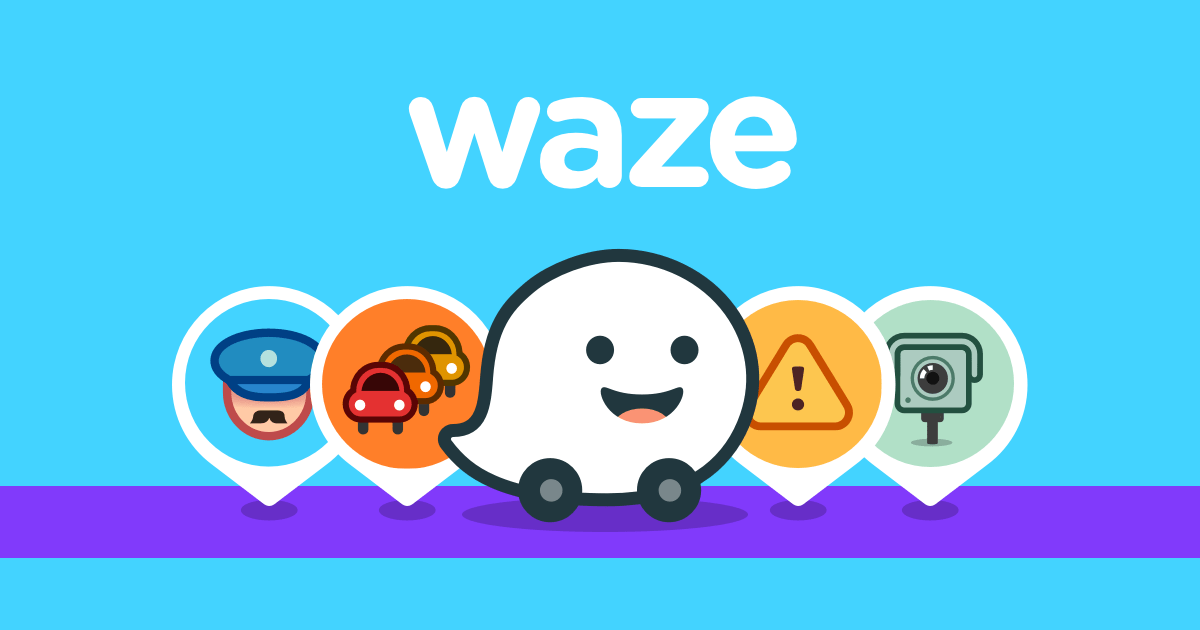

In [50]:
import pandas_profiling as pdp
import pandas as pd
import ipywidgets as widgets
from ipywidgets import IntSlider,interact, interactive, fixed, interact_manual,interact_manual,FloatSlider,ToggleButton
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.nbformat.current import read, write
from IPython.display import clear_output
from folium import Map, FeatureGroup, Marker, LayerControl
import folium
import folium.plugins as plugins
import numpy as np
import webbrowser
from datetime import datetime, timedelta
from traitlets.config import Config
import ipywidgets as widgets
import ipyleaflet
from folium.plugins import HeatMap,MarkerCluster 
import time

In [4]:
alert=pd.read_excel(r"Z:\פרוייקטים\מאגרי מידע\סטטיסטיקה\WAZE\נתוני יוני 2020\Alert.xlsx")
iregular_jams=pd.read_excel(r"Z:\פרוייקטים\מאגרי מידע\סטטיסטיקה\WAZE\נתוני יוני 2020\IregularJams.xlsx")
jams=pd.read_excel(r"Z:\פרוייקטים\מאגרי מידע\סטטיסטיקה\WAZE\נתוני יוני 2020\Jams.xlsx")

# <font color=green><red># Alert Profile Report </font>

In [51]:
profile_alert = pdp.ProfileReport(alert)
profile_alert 

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,17
Number of observations,224686
Total Missing (%),1.0%
Total size in memory,28.3 MiB
Average record size in memory,132.0 B
Numeric,7
Categorical,8
Boolean,0
Date,2
Text (Unique),0
Rejected,0


# <font color=green><red>#IRegular Jams Profile Report </font>

In [52]:
profile_iregular_jams = pdp.ProfileReport(iregular_jams)
profile_iregular_jams

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,15
Number of observations,2280
Total Missing (%),3.1%
Total size in memory,267.3 KiB
Average record size in memory,120.1 B
Numeric,9
Categorical,2
Boolean,0
Date,3
Text (Unique),0
Rejected,1


# <font color=green><red>#Jams Profile Report </font>

In [53]:
profile_jams = pdp.ProfileReport(jams)
profile_jams 

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,16
Number of observations,217205
Total Missing (%),0.7%
Total size in memory,26.5 MiB
Average record size in memory,128.0 B
Numeric,7
Categorical,6
Boolean,0
Date,2
Text (Unique),0
Rejected,0


In [64]:
alert['PublicationTime']=alert['PublicationTime'].astype(str)
alert['PublicationTime']=alert['PublicationTime'].str[:19]
alert['Date']=pd.to_datetime(alert['PublicationTime'].str[:10])
alert['Time']=pd.to_datetime(alert['PublicationTime'].str[11:20], format='%H:%M:%S').dt.time
alert['Time']=alert['Time'].astype(str)
alert['Hour']=alert['Time'].str[:2]
alert['Hour']=alert['Hour'].astype(int)
alert['Key']=alert['Day'].map(str)+alert['Hour'].map(str)
alert.groupby('AlertType').size()
alert['PublicationTime']=pd.to_datetime(alert['PublicationTime'])
alert['PublicationTime']=alert['PublicationTime'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [65]:
iregular_jams['PublicationTime']=iregular_jams['PublicationTime'].astype(str)
iregular_jams['PublicationTime']=iregular_jams['PublicationTime'].str[:19]
iregular_jams['Pub_Date']=pd.to_datetime(iregular_jams['PublicationTime'].str[:10])
iregular_jams['Pub_Time']=pd.to_datetime(iregular_jams['PublicationTime'].str[11:20], format='%H:%M:%S').dt.time
iregular_jams['LastUpdate']=iregular_jams['LastUpdate'].astype(str)
iregular_jams['LastUpdate']=iregular_jams['LastUpdate'].str[:19]
iregular_jams['LU_Date']=pd.to_datetime(iregular_jams['LastUpdate'].str[:10])
iregular_jams['LU_Time']=pd.to_datetime(iregular_jams['LastUpdate'].str[11:20], format='%H:%M:%S').dt.time


In [66]:
jams['PublicationTime']=jams['PublicationTime'].astype(str)
jams['PublicationTime']=jams['PublicationTime'].str[:19]
jams['Date']=pd.to_datetime(jams['PublicationTime'].str[:10])
jams['Time']=pd.to_datetime(jams['PublicationTime'].str[11:20], format='%H:%M:%S').dt.time
jams['Day']=jams['Date'].dt.day

# <font color=Blue><red>#Alert

## <font color=Blue><red>#1.1 Accident <BR> #1.1.1 Average of different accident per Hour by Day</font>

In [57]:
# AlertSubTypepivot=alert[alert['AlertType']=='ACCIDENT'].groupby(['Hour','AlertSubType']).size().to_frame('S').drop_duplicates().sort_values('S', ascending=False).unstack().plot.bar(figsize = (20,10),rot=0,fontsize=16)
@interact
def plot(Day=alert['Day'].sort_values().unique()):
    AlertSubTypepivot=alert[(alert['AlertType']=='ACCIDENT') 
                           & (alert['Day']==Day)].groupby(['Hour','AlertSubType']).size().to_frame('S').drop_duplicates().sort_values('S', ascending=False).unstack().plot.bar(figsize = (20,10),rot=0,fontsize=16)


interactive(children=(Dropdown(description='Day', options=(1, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, …

## <font color=Blue><red>#1.1.2 Position of different accident <BR>#HeatMap</font>

In [58]:
from folium import Map, FeatureGroup, Marker, LayerControl
data=alert[(alert['AlertSubType']=='ACCIDENT_MAJOR') |(alert['AlertSubType']=='ACCIDENT_MINOR') ][['Latitude','Longitude']].drop_duplicates()
this_map = folium.Map(prefer_canvas=True,tiles='openstreetmap')
HeatMap(data).add_to(folium.FeatureGroup(name='Heat Map').add_to(this_map))
this_map.fit_bounds(this_map.get_bounds())
folium.LayerControl().add_to(this_map)
this_map




## <font color=Blue><red>#Cluster </font>
    

In [59]:
this_map = folium.Map(prefer_canvas=True,tiles='openstreetmap')
data=alert[(alert['AlertSubType']=='ACCIDENT_MAJOR')| (alert['AlertSubType']=='ACCIDENT_MINOR')][['Latitude','Longitude']].drop_duplicates()
this_map = folium.Map(prefer_canvas=True,tiles='openstreetmap')
locations = list(zip(data.Latitude, data.Longitude))
icons = [folium.Icon(icon="car", prefix="fa") for _ in range(len(locations))]
cluster = MarkerCluster(locations=locations, icons=icons)
this_map.add_child(cluster)
this_map.fit_bounds(this_map.get_bounds())
this_map


## <font color=Blue><red>#1.2 Jams <BR>#1.2.1 Analyse Jam by specific Day and Hour </font>

In [60]:
@interact
def plot_jams(Day=jams['Day'].sort_values().unique(),Hour=jams['Hour'].sort_values().unique()):
    this_map = folium.Map(prefer_canvas=True,tiles='cartodbpositron',zoom_start =13)
    def datafun(d,h,color):
        return alert[(alert['AlertType']=='JAM') & 
               (alert['Day']==d)& 
               (alert['Hour']==h) ].drop_duplicates().apply(lambda x: plotDot(x['Latitude'],x['Longitude'],color), axis = 1)

    def plotDot(latitude,longitude,color):

        '''input: series that contains a numeric named latitude and a numeric named longitude
        this function creates a CircleMarker and adds it to your this_map'''
        folium.CircleMarker(location=[latitude, longitude],
                            radius=2,
                            color=color,
                            weight=5).add_to(this_map)
        return this_map
    datafun(Day,Hour,'red')
    this_map.fit_bounds(this_map.get_bounds())
    display(this_map)
    this_map = folium.Map(
        location=[ 31.771959, 35.217018],
        zoom_start=13
        )
    data=alert[(alert['AlertType']=='JAM') & (alert['Day']==Day) & (alert['Hour']==Hour)][['Latitude','Longitude','PublicationTime','Day']].drop_duplicates().dropna().reset_index()
    lines=[]
    for i in range(0,len(data)):
                lines.append(
                    {
                        'coordinates': [
                            [data.loc[i,'Longitude'],data.loc[i,'Latitude']],
                        ],
                        'dates': [
                            data.loc[i,'PublicationTime'],
                        ],
                        'color': 'red'
                    },
                )

    features = [
            {
                'type': 'Feature',
                'geometry': {
                    'type': 'LineString',
                    'coordinates': line['coordinates'],
                },
                'properties': {
                    'times': line['dates'],
                    'style': {
                        'color': line['color'],
                        'weight': line['weight'] if 'weight' in line else 5
                    }
                }
            }
            for line in lines
        ]
    plugins.TimestampedGeoJson({
        'type': 'FeatureCollection',
        'features': features,
    }, period='PT1M', add_last_point=True, time_slider_drag_update = True ).add_to(this_map)
    fs = plugins.Fullscreen()
    this_map.add_child(fs)
    display(this_map)
        


interactive(children=(Dropdown(description='Day', options=(1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, …

## <font color=Blue><red>#1.3. Position of road closed </font>

In [147]:
data=alert[alert['AlertType']=='ROAD_CLOSED'][['Latitude','Longitude']].drop_duplicates()
data

this_map = folium.Map(prefer_canvas=True,tiles='openstreetmap')
def plotDot(latitude,longitude,color):
    
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[latitude, longitude],
                        radius=2,
                        color=color,
                        weight=5).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
data.apply(lambda x: plotDot(x['Latitude'],x['Longitude'],'red'), axis = 1)
#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())
# minor=alert[alert['AlertSubType']=='ACCIDENT_MINOR'][['Latitude','Longitude']]

# minor.apply(lambda x: plotDot(x['Latitude'],x['Longitude'],'blue'), axis = 1)


this_map

# <font color=Orange><red>#2. Regular Jams </font>

In [67]:
import polyline
jams_time=pd.read_excel(r"Z:\פרוייקטים\מאגרי מידע\סטטיסטיקה\WAZE\נתוני יוני 2020\times_jams.xlsx")
jams_time['PublicationTime']=pd.to_datetime(jams_time['PublicationTime'])
jams_time['PublicationTime']=jams_time['PublicationTime'].dt.strftime('%Y-%m-%d %H:%M:%S')
jams_time['UpdateTime']=pd.to_datetime(jams_time['UpdateTime'])
jams_time['UpdateTime']=jams_time['UpdateTime'].dt.strftime('%Y-%m-%d %H:%M:%S')


## <font color=Orange><red>  #2.1 Evolution of Regular Jams By Hour </font>

In [68]:

this_map = folium.Map(prefer_canvas=True,tiles='openstreetmap')
jams_time['points']=jams_time['Polyline'].apply(lambda x: polyline.decode(x,geojson=True))
# d = widgets.IntSlider(  description='Day',min=14, max=jams_time['Day'].max(), value=jams_time['Day'].min())
# h = widgets.IntSlider(description='Hour',min=jams_time['Hour'].min(), max=jams_time['Hour'].max(), value=jams_time['Hour'].min())
# display(d,h)


# button = widgets.Button(description="GO!")
# output = widgets.Output()
# button. button_style='warning'
# display(button, output)
@interact
def plot_jams(Day=jams['Day'].sort_values().unique(),Hour=jams['Hour'].sort_values().unique()):

        this_map = folium.Map(
        location=[ 31.771959, 35.217018],
        zoom_start=13
        )
        data=jams_time[ (jams_time['Day']==Day) & (jams_time['Hour']==Hour)].reset_index()
        lines=[]
        for i in range(0,len(data)):
            lines.append(
                {
                    'coordinates': data.loc[i,'points'],

                    'dates': [
                            data.loc[i,'PublicationTime'],
                         data.loc[i,'UpdateTime']

                    ],
                    'color': 'red'
                },
            )

        features = [
            {
                'type': 'Feature',
                'geometry': {
                    'type': 'LineString',
                    'coordinates': line['coordinates'],
                },

                'properties': {
                    'times': line['dates'],
                    'style': {
                        'color': line['color'],
                        'weight': line['weight'] if 'weight' in line else 5
                    }
                }
            }
            for line in lines
        ]
        plugins.TimestampedGeoJson({
            'type': 'FeatureCollection',
            'features': features,
        }, period='PT1M').add_to(this_map)
        fs = plugins.Fullscreen()
        this_map.add_child(fs)
        display(this_map)


interactive(children=(Dropdown(description='Day', options=(1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, …

## <font color=Orange><red>  #2.2 Level of Regular Jams By Day and Hour </font>

In [69]:
this_map = folium.Map(prefer_canvas=True,tiles='openstreetmap')
jams['points']=jams['Polyline'].apply(lambda x: polyline.decode(x))
jams['color']=np.where(jams['Level']==5,'darkred',np.where(jams['Level']==4,'red',np.where(jams['Level']==3,'crimson',np.where(jams['Level']==2,'indianred',np.where(jams['Level']==1,'lightcoral',0)))))


In [70]:
@interact
def plot_jams(Day=jams['Day'].sort_values().unique(),Hour=jams['Hour'].sort_values().unique()):
    this_map = folium.Map(prefer_canvas=True,tiles='openstreetmap')
    data=jams[(jams['Day']==Day) & (jams['Hour']==Hour)].head(20)
    def plotL(points,color):

        '''input: series that contains a numeric named latitude and a numeric named longitude
        this function creates a CircleMarker and adds it to your this_map'''
        folium.PolyLine(locations=points,
                            radius=2,
                            color=color,
                            weight=5).add_to(this_map)
    #use df.apply(,axis=1) to "iterate" through every row in your dataframe
    data.apply(lambda x: plotL(x['points'],x['color']), axis = 1)
    this_map.fit_bounds(this_map.get_bounds())
    display(this_map)


interactive(children=(Dropdown(description='Day', options=(1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, …